In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

In [2]:
raw_data = pd.read_csv('Customer_Data.csv')
raw_data

,Customer_ID,Customer_Status,Old_Class,Geographical_ID,CustCreationDate,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Date_Of_Last_ Purchase,Unnamed: 11,Unnamed: 12
0,100001,Active,C,1,2019-03-07,0.0,0.0,0.0,0.0,0,2020-01-11,NaN,NaN
1,100002,Active,C,1,2019-03-09,0.0,0.0,0.0,0.0,0,2020-02-11,NaN,NaN
2,100003,Active,C,1,2019-05-07,0.0,0.0,0.0,0.0,0,2020-02-29,NaN,NaN
3,100004,Active,C,1,2019-05-15,0.0,0.0,0.0,0.0,0,2020-03-01,NaN,NaN
4,100005,Inactive,C,2,2019-05-21,0.0,0.0,0.0,0.0,0,2020-02-09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88805,188806,Active,C,5,2021-11-27,0.0,0.0,0.0,0.0,0,2022-02-03,NaN,NaN
88806,188807,Active,C,18,2021-11-27,0.0,0.0,0.0,0.0,0,2022-02-03,NaN,NaN
88807,188808,Active,C,18,2021-11-27,0.0,0.0,0.0,0.0,0,2022-02-03,NaN,NaN
88808,188809,Active,C,18,2021-11-27,0.0,0.0,0.0,0.0,0,2022-02-03,NaN,NaN


In [3]:
raw_data["CustCreationDate"] = pd.to_datetime(raw_data["CustCreationDate"])
raw_data["Date_Of_Last_ Purchase"] = pd.to_datetime(raw_data["Date_Of_Last_ Purchase"])
raw_data["CustCreation_days"] = (raw_data["CustCreationDate"] - raw_data["CustCreationDate"].min()).dt.days
raw_data["LastPurchase_days"] = (raw_data["Date_Of_Last_ Purchase"] - raw_data["Date_Of_Last_ Purchase"].min()).dt.days
raw_data = raw_data.drop(columns=["CustCreationDate", "Date_Of_Last_ Purchase"])
raw_data


,Customer_ID,Customer_Status,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,Unnamed: 11,Unnamed: 12,CustCreation_days,LastPurchase_days
0,100001,Active,C,1,0.0,0.0,0.0,0.0,0,NaN,NaN,32,14.0
1,100002,Active,C,1,0.0,0.0,0.0,0.0,0,NaN,NaN,34,45.0
2,100003,Active,C,1,0.0,0.0,0.0,0.0,0,NaN,NaN,93,63.0
3,100004,Active,C,1,0.0,0.0,0.0,0.0,0,NaN,NaN,101,64.0
4,100005,Inactive,C,2,0.0,0.0,0.0,0.0,0,NaN,NaN,107,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88805,188806,Active,C,5,0.0,0.0,0.0,0.0,0,NaN,NaN,1028,768.0
88806,188807,Active,C,18,0.0,0.0,0.0,0.0,0,NaN,NaN,1028,768.0
88807,188808,Active,C,18,0.0,0.0,0.0,0.0,0,NaN,NaN,1028,768.0
88808,188809,Active,C,18,0.0,0.0,0.0,0.0,0,NaN,NaN,1028,768.0


In [4]:
X = raw_data.drop(['Customer_ID','Unnamed: 11','Unnamed: 12'],axis=1)
X

,Customer_Status,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,CustCreation_days,LastPurchase_days
0,Active,C,1,0.0,0.0,0.0,0.0,0,32,14.0
1,Active,C,1,0.0,0.0,0.0,0.0,0,34,45.0
2,Active,C,1,0.0,0.0,0.0,0.0,0,93,63.0
3,Active,C,1,0.0,0.0,0.0,0.0,0,101,64.0
4,Inactive,C,2,0.0,0.0,0.0,0.0,0,107,43.0
...,...,...,...,...,...,...,...,...,...,...
88805,Active,C,5,0.0,0.0,0.0,0.0,0,1028,768.0
88806,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0
88807,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0
88808,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0


In [5]:
X_encoded = LabelEncoder().fit_transform(X.Customer_Status)
X.Customer_Status = X_encoded
X_encoded = LabelEncoder().fit_transform(X.Old_Class)
X.Old_Class = X_encoded
print(X.isnull().sum())

Customer_Status            0
Old_Class                  0
Geographical_ID            0
Net_ Purchase(IRR)         0
Avg_Invoice_Row_No         0
Waste_Rate                 0
Rejected_Rate              0
Avg_Purchase_In_Month      0
CustCreation_days          0
LastPurchase_days        219
dtype: int64


In [6]:
X.loc[:, "LastPurchase_days"] = X["LastPurchase_days"].fillna(X["LastPurchase_days"].median())
X


,Customer_Status,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,CustCreation_days,LastPurchase_days
0,0,3,1,0.0,0.0,0.0,0.0,0,32,14.0
1,0,3,1,0.0,0.0,0.0,0.0,0,34,45.0
2,0,3,1,0.0,0.0,0.0,0.0,0,93,63.0
3,0,3,1,0.0,0.0,0.0,0.0,0,101,64.0
4,1,3,2,0.0,0.0,0.0,0.0,0,107,43.0
...,...,...,...,...,...,...,...,...,...,...
88805,0,3,5,0.0,0.0,0.0,0.0,0,1028,768.0
88806,0,3,18,0.0,0.0,0.0,0.0,0,1028,768.0
88807,0,3,18,0.0,0.0,0.0,0.0,0,1028,768.0
88808,0,3,18,0.0,0.0,0.0,0.0,0,1028,768.0


In [7]:
X_standarized = StandardScaler().fit_transform(X)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standarized)
X_pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
X_pca_df.head()

,PCA1,PCA2
0,-2.528344,-1.137213
1,-2.457153,-1.094487
2,-2.409627,-0.897353
3,-2.406482,-0.872332
4,-3.539136,-1.495280


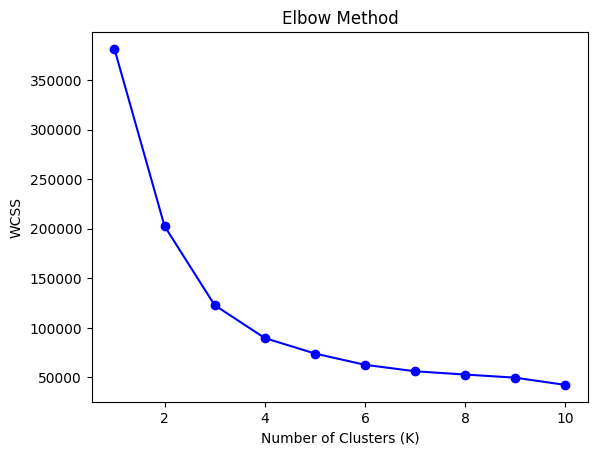

In [9]:
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [10]:
model = KMeans(n_clusters=4, random_state=42)
y_pred = model.fit_predict(X_pca)

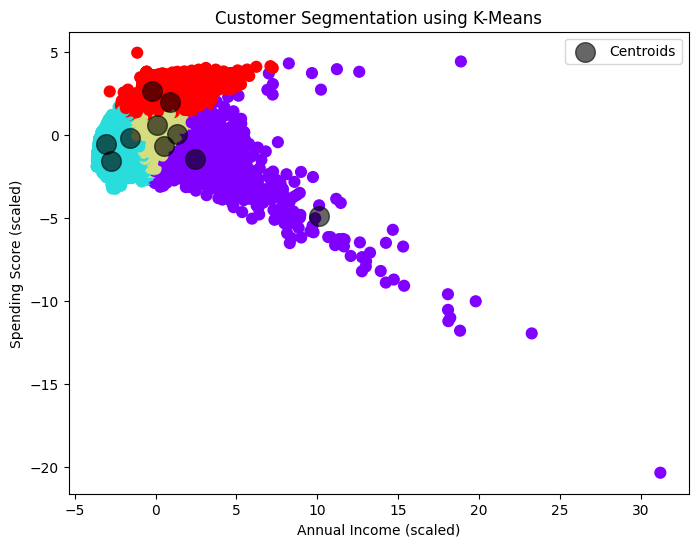

In [11]:
plt.figure(figsize=(8,6))
plt.scatter( X_pca[:,0],X_pca[:,1],c=y_pred, cmap='rainbow', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', s=200, alpha=0.6, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

In [12]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.28742062 0.14221412]
Total explained variance: 0.4296347385061975


In [13]:
raw_data['Cluster'] = model.labels_
clean = raw_data.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
raw_data = clean
raw_data

,Customer_ID,Customer_Status,Old_Class,Geographical_ID,Net_ Purchase(IRR),Avg_Invoice_Row_No,Waste_Rate,Rejected_Rate,Avg_Purchase_In_Month,CustCreation_days,LastPurchase_days,Cluster
0,100001,Active,C,1,0.0,0.0,0.0,0.0,0,32,14.0,1
1,100002,Active,C,1,0.0,0.0,0.0,0.0,0,34,45.0,1
2,100003,Active,C,1,0.0,0.0,0.0,0.0,0,93,63.0,1
3,100004,Active,C,1,0.0,0.0,0.0,0.0,0,101,64.0,1
4,100005,Inactive,C,2,0.0,0.0,0.0,0.0,0,107,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
88805,188806,Active,C,5,0.0,0.0,0.0,0.0,0,1028,768.0,3
88806,188807,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0,3
88807,188808,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0,3
88808,188809,Active,C,18,0.0,0.0,0.0,0.0,0,1028,768.0,3


In [14]:
# Rata-rata per cluster
data = raw_data.drop(['Customer_Status','Old_Class','Customer_ID'],axis=1)
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         Geographical_ID  Net_ Purchase(IRR)  Avg_Invoice_Row_No  Waste_Rate  \
Cluster                                                                        
0              11.743095        1.535808e+09           17.280100    0.041442   
1              12.235779        2.147387e+07            2.732983    0.077305   
2              13.990062        3.034523e+08            9.979478    0.058948   
3              14.809471        2.633167e+08           12.458091    1.239570   

         Rejected_Rate  Avg_Purchase_In_Month  CustCreation_days  \
Cluster                                                            
0             0.073331              62.958846         148.946659   
1             0.801001               3.401950         171.923276   
2             0.498815              30.601850         169.988945   
3             4.928475              19.373889         772.147112   

         LastPurchase_days  
Cluster                     
0               755.726193  
1               307.459

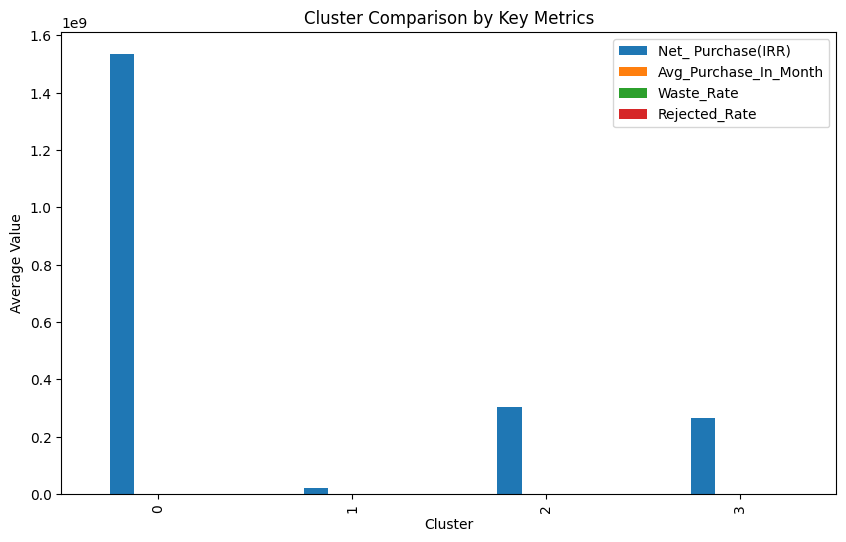

In [15]:
import matplotlib.pyplot as plt

summary_plot = cluster_summary[['Net_ Purchase(IRR)', 'Avg_Purchase_In_Month', 'Waste_Rate', 'Rejected_Rate']]
summary_plot.plot(kind='bar', figsize=(10,6))
plt.title("Cluster Comparison by Key Metrics")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.legend(loc='upper right')
plt.show()

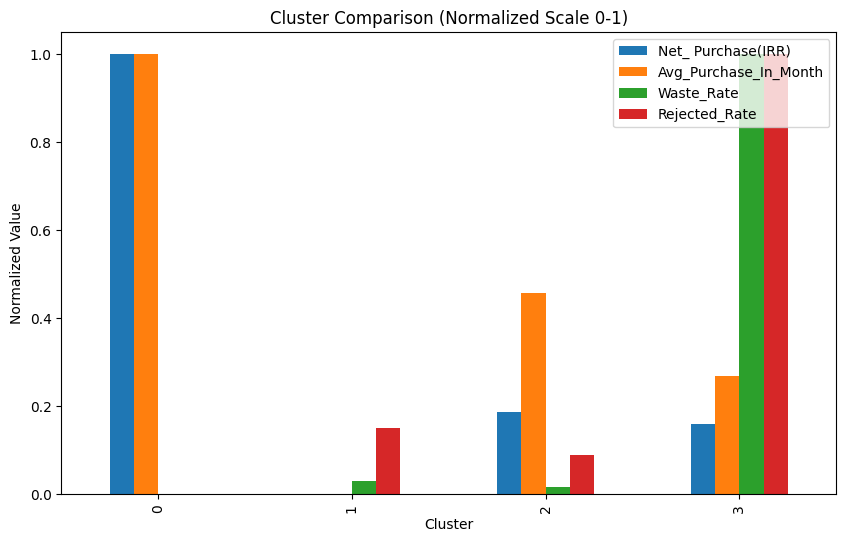

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(cluster_summary[['Net_ Purchase(IRR)', 'Avg_Purchase_In_Month', 'Waste_Rate', 'Rejected_Rate']])
scaled_df = pd.DataFrame(scaled, columns=['Net_ Purchase(IRR)', 'Avg_Purchase_In_Month', 'Waste_Rate', 'Rejected_Rate'])
scaled_df.index = cluster_summary.index

scaled_df.plot(kind='bar', figsize=(10,6))
plt.title("Cluster Comparison (Normalized Scale 0-1)")
plt.xlabel("Cluster")
plt.ylabel("Normalized Value")
plt.legend(loc='upper right')
plt.show()

In [17]:
scaled_df

,Net_ Purchase(IRR),Avg_Purchase_In_Month,Waste_Rate,Rejected_Rate
Cluster,,,,
0,1.000000,1.000000,0.000000,0.000000
1,0.000000,0.000000,0.029933,0.149876
2,0.186206,0.456704,0.014611,0.087636
3,0.159702,0.268180,1.000000,1.000000


### PERCOBAAN MENGGUNAKAN TSNE

In [18]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, random_state=42) 
X_tsne = tsne.fit_transform(X_standarized)

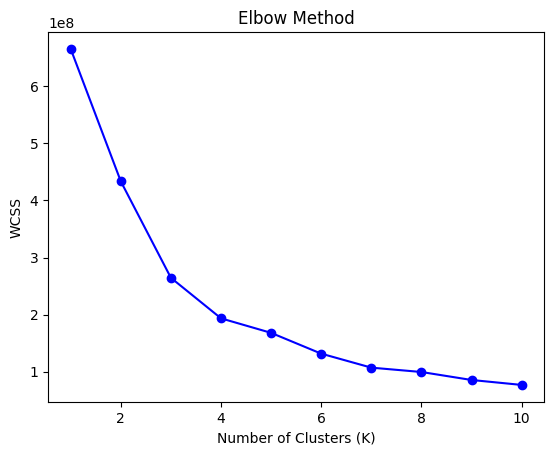

In [19]:
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [20]:
model1 = KMeans(n_clusters=7, random_state=42)
y_pred1 = model1.fit_predict(X_tsne) 


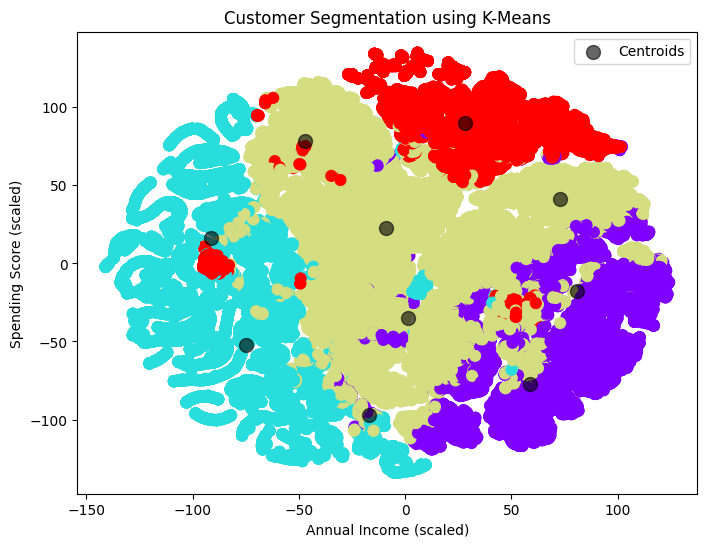

In [23]:
plt.figure(figsize=(8,6))
plt.scatter( X_tsne[:,0],X_tsne[:,1],c=y_pred, cmap='rainbow', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', s=100, alpha=0.6, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()